<a href="https://colab.research.google.com/github/jakeh46g/Unsupervised-Learning/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Mount Google Drive to access files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
# Import necessary libraries for data manipulation, visualization, and clustering
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_samples, silhouette_score

In [10]:
# Load the dataset from a CSV file in Google Drive into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data/nestegg.csv')

In [11]:
# Scale the data using z-scores and convert it back to a pandas DataFrame
scaled = stats.zscore(df)
scaled = pd.DataFrame(scaled, columns=df.columns)

In [12]:
# Iterate through different numbers of clusters to find the optimal number using the silhouette score
range_n_clusters = [2, 3, 4, 5, 6]
for n_clusters in range_n_clusters:
  # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto")
    cluster_labels = clusterer.fit_predict(scaled)
    silhouette_avg = silhouette_score(scaled, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.47753585914055313
For n_clusters = 3 The average silhouette_score is : 0.4172739280796073
For n_clusters = 4 The average silhouette_score is : 0.44423410691843834
For n_clusters = 5 The average silhouette_score is : 0.48969617877416205
For n_clusters = 6 The average silhouette_score is : 0.48008213686119333


In [17]:
# Initialize a KMeans model with 3 clusters
kmModel = KMeans(n_clusters = 3, n_init='auto')

In [18]:
# Fit the KMeans model to the original DataFrame
kmModel = kmModel.fit(df)

In [19]:
# Get the cluster centroids
centroids = kmModel.cluster_centers_

In [20]:
# Predict the cluster for each data point based on 'Age' and 'Income'
clusters = kmModel.fit_predict(df[['Age', 'Income']])

Text(0, 0.5, 'Income')

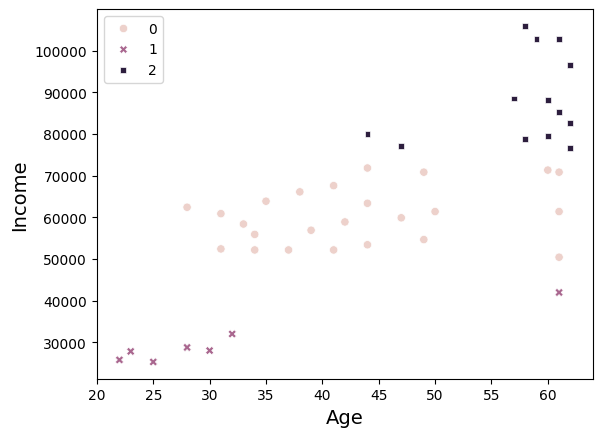

In [21]:
# Create a scatter plot of Age vs Income, colored by cluster
p = sns.scatterplot(data=df, x='Age',
                    y='Income', hue=clusters, style=clusters)
p.set_xlabel('Age', fontsize=14)
p.set_ylabel('Income', fontsize=14)